<a href="https://colab.research.google.com/github/gojiteji/AI_vocab_comparison/blob/main/Vocab_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from transformers import AutoTokenizer
T5tokenizer = AutoTokenizer.from_pretrained("t5-small")
mT5tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenize

In [13]:
T5vocab = T5tokenizer.convert_ids_to_tokens(range(T5tokenizer.vocab_size))
mT5vocab = mT5tokenizer.convert_ids_to_tokens(range(mT5tokenizer.vocab_size))

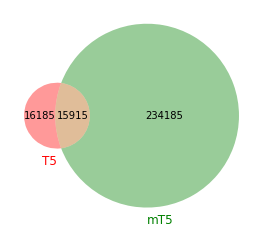

In [14]:
from matplotlib_venn import venn2,venn3
from matplotlib import pyplot
colors=['red','green']
v=venn2(subsets=([set(T5vocab),set(mT5vocab)]),set_labels = ('T5', 'mT5'),set_colors=colors)
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1
pyplot.show()

In [15]:
mBART25tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-cc25")
mBART50tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-50")
mBART25vocab = mBART25tokenizer.convert_ids_to_tokens(range(mBART25tokenizer.vocab_size))
mBART50vocab = mBART50tokenizer.convert_ids_to_tokens(range(mBART50tokenizer.vocab_size))
mT5vocab = mT5tokenizer.convert_ids_to_tokens(range(mT5tokenizer.vocab_size))

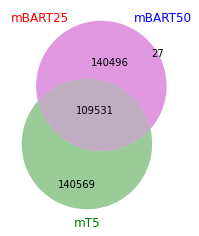

In [16]:
colors=['red','blue','green']
v=venn3(subsets=([set(mBART25vocab),set(mBART50vocab),set(mT5vocab)]),set_labels = ( 'mBART25','mBART50','mT5'),set_colors=colors)
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1
pyplot.show()

In [17]:
set(mBART50vocab)-set(mBART25vocab) & set(mBART50vocab)

{'af_ZA',
 'az_AZ',
 'bn_IN',
 'fa_IR',
 'gl_ES',
 'he_IL',
 'hr_HR',
 'id_ID',
 'ka_GE',
 'km_KH',
 'mk_MK',
 'ml_IN',
 'mn_MN',
 'mr_IN',
 'pl_PL',
 'ps_AF',
 'pt_XX',
 'sl_SI',
 'sv_SE',
 'sw_KE',
 'ta_IN',
 'te_IN',
 'th_TH',
 'tl_XX',
 'uk_UA',
 'ur_PK',
 'xh_ZA'}

In [18]:
from transformers import AutoTokenizer, AutoModelForCausalLM
GPTJtokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")
GPT2tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [19]:
GPTJvocab = GPTJtokenizer.convert_ids_to_tokens(range(GPTJtokenizer.vocab_size))
GPT2vocab = GPT2tokenizer.convert_ids_to_tokens(range(GPT2tokenizer.vocab_size))

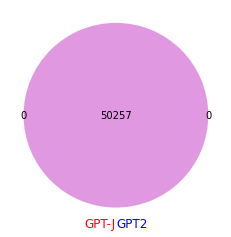

In [20]:
colors=['red','blue']
v=venn2(subsets=([set(GPTJvocab),set(GPT2vocab)]),set_labels = ( 'GPT-J','GPT2'),set_colors=colors)
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1
pyplot.show()

In [24]:
GPT2jatokenizer = AutoTokenizer.from_pretrained("rinna/japanese-gpt2-small")
!pip install fugashi ipadic
BERTjatokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")
T5jatokenizer = AutoTokenizer.from_pretrained("sonoisa/t5-base-japanese")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
GPT2javocab =[(v[1:] if v[0]=="▁" else v )for v in GPT2jatokenizer.convert_ids_to_tokens(range(GPT2jatokenizer.vocab_size))]
BERTjavocab =[(v[2:] if v[:2]=="##" else v )for v in BERTjatokenizer.convert_ids_to_tokens(range(BERTjatokenizer.vocab_size))]
T5javocab = [(v[1:] if v[0]=="▁" else v )for v in T5jatokenizer.convert_ids_to_tokens(range(T5jatokenizer.vocab_size))]

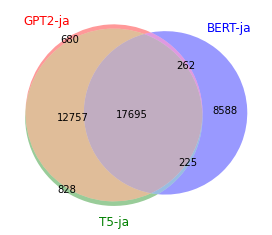

In [49]:
colors=['red','blue','green']
v=venn3(subsets=([set(GPT2javocab),set(BERTjavocab),set(T5javocab)]),set_labels = ( 'GPT2-ja','BERT-ja','T5-ja'),set_colors=colors)
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1
pyplot.show()

In [50]:
set(T5javocab)-(set(GPT2javocab) & set(T5javocab))

{'ホリ',
 'にはならない',
 '-2005',
 '秋田市',
 '瑞宝章',
 'ngc',
 '深夜番組',
 'stream',
 '2〜3',
 'come',
 'に入省',
 '幸い',
 '鈞',
 'any',
 '意見を',
 'ことを考え',
 'を負って',
 'を提唱した',
 'ゆかり',
 '1-3',
 'デヒドロゲナーゼ',
 'らしめ',
 'wiki',
 '臘',
 'tru',
 '二輪車',
 '夏に',
 '主戦場',
 'ログイン',
 'に売却',
 'ですが',
 'mura',
 '〜5',
 '--2005',
 'look',
 'アミド',
 'ction',
 'ピリ',
 'を起こさ',
 '行こう',
 'ーション',
 '井戸端',
 'golden',
 'ハシ',
 'ようで',
 '<extra_id_47>',
 'スマ',
 'の教員',
 '訃報',
 '久美子',
 'のカテゴリ',
 '<extra_id_25>',
 'ジンバブエ',
 'を見ると',
 'sai',
 'ケネス',
 'なりません',
 '掛かった',
 '読んで',
 'テット',
 '良質な記事の選考',
 '歳の若さで',
 '選手に関するカテゴリ',
 '囚われ',
 '同志社',
 'だけを',
 'メインキャラクター',
 '舞う',
 '届いた',
 'になります',
 'どの程度',
 'その直後',
 '<extra_id_10>',
 'ちゅうけいきょく',
 'とりあえず',
 '内訳',
 '決定した',
 '工学科',
 '<extra_id_11>',
 'に集中',
 '本件',
 'ノーベル賞',
 '正当',
 'まして',
 '<extra_id_14>',
 'が出て',
 '知っていた',
 'そこには',
 'sal',
 '<extra_id_31>',
 '見送られ',
 '1/4',
 'ポータル',
 '<extra_id_89>',
 'できます',
 '対立する',
 'sei',
 'アダルトビデオ',
 'ディレクトリ',
 '<extra_id_44>',
 'の大字',
 '<extra_id_85>',
 '枇',
 'ヴィット',
 '向かわ